## Pytorch toturials about building a model from scratch

   
### Building a Convolutional Neural Network from Scratch with PyTorch
### This tutorial will guide you through the process of building a Convolutional Neural Network (CNN) from scratch using PyTorch. We'll focus on understanding the building blocks and architecture of a CNN rather than the training process.

## Table of Contents
1. [Introduction to CNNs](#1-introduction-to-cnns)
2. [Setting Up PyTorch](#2-setting-up-pytorch)
3. [Basic Building Blocks of CNNs](#3-basic-building-blocks-of-cnns)
   - Convolutional Layers
   - Activation Functions
   - Pooling Layers
   - Normalization Layers
   - Fully Connected Layers
4. [Creating a Complete CNN Architecture](#4-creating-a-complete-cnn-architecture)
5. [Common Initialization Methods](#5-common-initialization-methods)
6. [Model Inspection and Visualization](#6-model-inspection-and-visualization)


## 1. Introduction to CNNs


### Typical CNN Architecture:

A CNN usually consists of:
- **Convolutional layers**: Extract features from input data
- **Activation functions**: Introduce non-linearity
- **Pooling layers**: Reduce spatial dimensions and computational load
- **Normalization layers**: Stabilize and accelerate training
- **Fully connected layers**: Perform classification based on extracted features



## 2. Setting Up PyTorch

In [1]:
pip install torchsummary


  Using cached torchsummary-1.5.1-py3-none-any.whl.metadata (296 bytes)
Using cached torchsummary-1.5.1-py3-none-any.whl (2.8 kB)


In [2]:
import torch
import torch.nn as nn                # Neural network modules
import torch.nn.functional as F      # Functional operations like activation functions
import numpy as np                   # For numerical operations
import matplotlib.pyplot as plt      # For visualization
from torchvision import transforms   # For image transformations
from torchsummary import summary     # For model visualization

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

c:\Users\User\anaconda3\envs\vit\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda:0


## 3. Basic Building Blocks of CNNs

### 3.1 Convolutional Layers

Convolutional layers are the core building blocks of CNNs. They apply a set of learnable filters to input data to extract features.

#### Key Parameters:
- **in_channels**: Number of input channels (e.g., 3 for RGB images)
- **out_channels**: Number of output channels (number of filters)
- **kernel_size**: Size of the convolutional filter (e.g., 3×3, 5×5)
- **stride**: Step size when sliding the filter
- **padding**: Zero-padding added to the input
- **dilation**: Spacing between kernel elements
- **groups**: Controls the connections between inputs and outputs
- **bias**: Whether to add a learnable bias

#### Example:
![alternatvie text](https://lh3.googleusercontent.com/d/10TzuINsrSvDvfgl2x35QEc4OnehNr1Y5)
![alternatvie text](https://lh3.googleusercontent.com/d/1OBP4vbYREqAUpdkZWHyKvR182RsD800w)
![alternatvie text](https://lh3.googleusercontent.com/d/1_c_pI8C_RhMJyjoG_CB-xQ2J3-9qBdl_)

In [3]:
# Create a simple convolutional layer
# Parameters: in_channels=3 (RGB image), out_channels=16 (number of filters),
# kernel_size=3 (3x3 filter), stride=1, padding=1 (to preserve spatial dimensions)
conv_layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)

# Let's create a random input tensor to simulate an RGB image
# Shape: [batch_size, channels, height, width] = [1, 3, 32, 32]
input_tensor = torch.randn(1, 3, 32, 32)

# Pass the input through the convolutional layer
output = conv_layer(input_tensor)

print(f"Input shape: {input_tensor.shape}")
print(f"Output shape: {output.shape}")

Input shape: torch.Size([1, 3, 32, 32])
Output shape: torch.Size([1, 16, 32, 32])


#### Understanding Output Dimensions

The output dimensions of a convolutional layer can be calculated using the formula:

$$\\{Output Size} = \frac{\\{Input Size} - \\{Kernel Size} + 2 \\* \\{Padding}}{\\{Stride}} + 1$$

In [4]:
# Function to calculate and display the output size of a convolutional layer
def conv_output_size(input_size, kernel_size, stride, padding):
    output_size = (input_size - kernel_size + 2 * padding) // stride + 1
    return output_size

# Example: 32x32 input, 3x3 kernel, stride=1, padding=1
input_size = 32
kernel_size = 3
stride = 1
padding = 1

output_size = conv_output_size(input_size, kernel_size, stride, padding)
print(f"Input: {input_size}x{input_size}, Kernel: {kernel_size}x{kernel_size}, Stride: {stride}, Padding: {padding}")
print(f"Output: {output_size}x{output_size}")

# Example: 32x32 input, 3x3 kernel, stride=2, padding=1
stride = 2
output_size = conv_output_size(input_size, kernel_size, stride, padding)
print(f"\nInput: {input_size}x{input_size}, Kernel: {kernel_size}x{kernel_size}, Stride: {stride}, Padding: {padding}")
print(f"Output: {output_size}x{output_size}")

Input: 32x32, Kernel: 3x3, Stride: 1, Padding: 1
Output: 32x32

Input: 32x32, Kernel: 3x3, Stride: 2, Padding: 1
Output: 16x16


### 3.2 Activation Functions

Activation functions introduce non-linearity into the network, allowing it to learn complex patterns. Without them, the network would just be a series of linear transformations. It also prevent the gradient explosion a little bit.

#### Common Activation Functions in CNNs:

1. **ReLU (Rectified Linear Unit)**: The most common activation function in CNNs.
2. **Leaky ReLU**: A variant of ReLU that allows small negative values.
3. **ELU (Exponential Linear Unit)**: Smoother version of ReLU.
4. **Sigmoid**: Maps values to the range [0, 1].
5. **Tanh**: Maps values to the range [-1, 1].

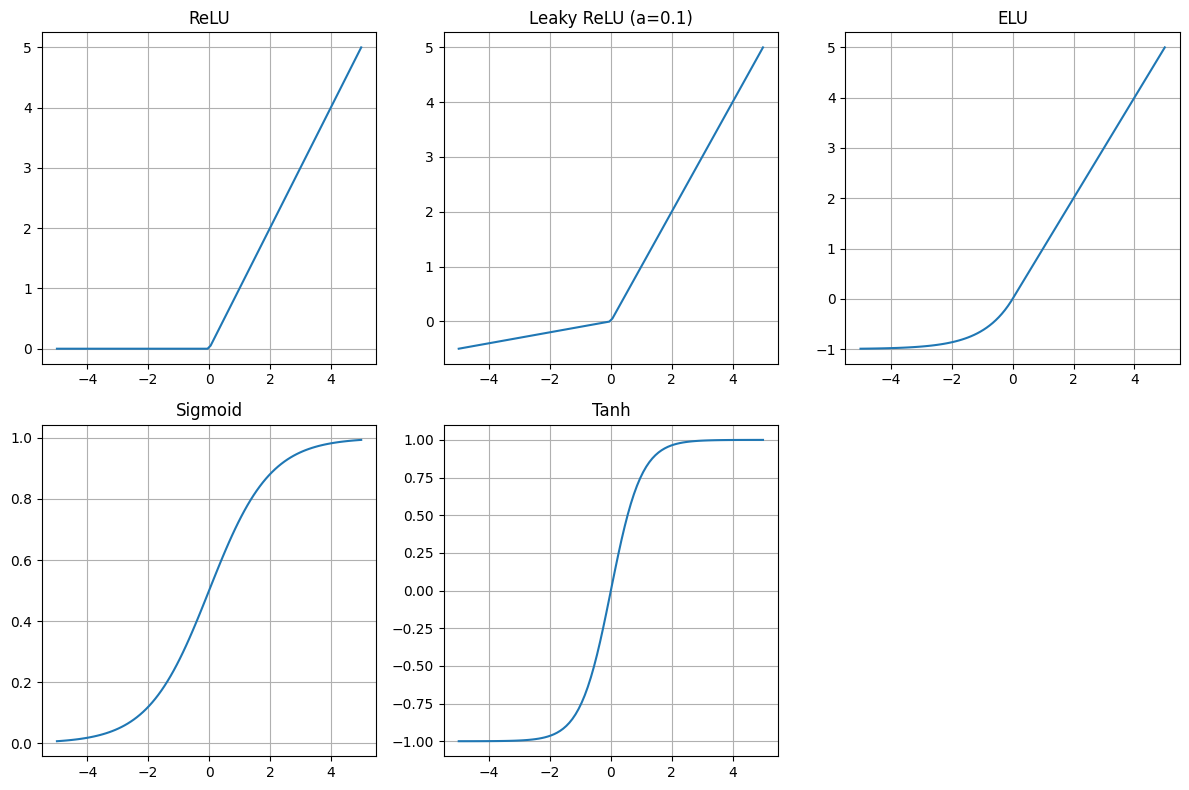

In [7]:
# Visualize the activation functions
x_range = torch.linspace(-5, 5, 100)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x_range, nn.ReLU()(x_range))
plt.title('ReLU')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x_range, nn.LeakyReLU(0.1)(x_range))
plt.title('Leaky ReLU (a=0.1)')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x_range, nn.ELU()(x_range))
plt.title('ELU')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x_range, nn.Sigmoid()(x_range))
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(x_range, nn.Tanh()(x_range))
plt.title('Tanh')
plt.grid(True)

plt.tight_layout()
plt.show()

In [5]:
# Create sample input tensor
x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])

# ReLU: f(x) = max(0, x)
relu = nn.ReLU()
relu_output = relu(x)
print(f"ReLU: {relu_output}")

# Leaky ReLU: f(x) = max(0.01*x, x)
leaky_relu = nn.LeakyReLU(negative_slope=0.01)
leaky_relu_output = leaky_relu(x)
print(f"Leaky ReLU: {leaky_relu_output}")

# ELU: f(x) = x if x > 0, alpha * (exp(x) - 1) if x <= 0
elu = nn.ELU(alpha=1.0)
elu_output = elu(x)
print(f"ELU: {elu_output}")

# Sigmoid: f(x) = 1 / (1 + exp(-x))
sigmoid = nn.Sigmoid()
sigmoid_output = sigmoid(x)
print(f"Sigmoid: {sigmoid_output}")

# Tanh: f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))
tanh = nn.Tanh()
tanh_output = tanh(x)
print(f"Tanh: {tanh_output}")

ReLU: tensor([0., 0., 0., 1., 2.])
Leaky ReLU: tensor([-0.0200, -0.0100,  0.0000,  1.0000,  2.0000])
ELU: tensor([-0.8647, -0.6321,  0.0000,  1.0000,  2.0000])
Sigmoid: tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])
Tanh: tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640])


### 3.3 Pooling Layers
Pooling layers reduce the spatial dimensions (width and height) of the feature maps, decreasing the computational load and helping to make the model more robust to variations in the input.
#### Common Types of Pooling:

1. **Max Pooling**: Takes the maximum value from each window.
2. **Average Pooling**: Takes the average of all values in each window.
3. **Global Pooling**: Reduces each feature map to a single value (used before fully connected layers).

![alternatvie text](https://lh3.googleusercontent.com/d/1sdrUMexXiXY2SRBtXDRP9nWdS9HcGKpt)

In [8]:
# Create a sample feature map [batch_size, channels, height, width]
feature_map = torch.tensor([
    [
        [
            [1, 2, 3, 4],
            [5, 6, 7, 8],
            [9, 10, 11, 12],
            [13, 14, 15, 16]
        ]
    ]
], dtype=torch.float32)

print("Original feature map:")
print(feature_map.squeeze())  # Removing batch and channel dimensions for clarity

# Max Pooling with a 2x2 window and stride 2
max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
max_pool_output = max_pool(feature_map)
print("\nMax Pooling output:")
print(max_pool_output.squeeze())

# Average Pooling with a 2x2 window and stride 2
avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)
avg_pool_output = avg_pool(feature_map)
print("\nAverage Pooling output:")
print(avg_pool_output.squeeze())

# Global Average Pooling
global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Output size of 1x1
global_avg_pool_output = global_avg_pool(feature_map)
print("\nGlobal Average Pooling output:")
print(global_avg_pool_output.squeeze())

Original feature map:
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.]])

Max Pooling output:
tensor([[ 6.,  8.],
        [14., 16.]])

Average Pooling output:
tensor([[ 3.5000,  5.5000],
        [11.5000, 13.5000]])

Global Average Pooling output:
tensor(8.5000)


### 3.4 Normalization Layers

Normalization layers help stabilize and accelerate the training process by normalizing the activations of the previous layer. They reduce internal covariate shift, allowing for higher learning rates and making the network less sensitive to weight initialization.
#### Types of Normalization in CNNs:

1. **Batch Normalization**: Normalizes activations across the batch dimension.
2. **Layer Normalization**: Normalizes across all features for each sample.
3. **Group Normalization**: A middle ground between batch and layer normalization.
4. **Instance Normalization**: Normalizes each channel of each sample individually.

![alternatvie text](https://lh3.googleusercontent.com/d/1duyreZs2bCWh-nFHJ1J0Z4jasCmDL1FL)

In [9]:
# Create a random batch of feature maps [batch_size, channels, height, width]
batch_size = 4
channels = 3
height, width = 8, 8
features = torch.randn(batch_size, channels, height, width)

# Apply batch normalization
# num_features is the number of channels in the input
batch_norm = nn.BatchNorm2d(num_features=channels)
bn_output = batch_norm(features)

# Calculate statistics before and after normalization
original_mean = features.mean(dim=(0, 2, 3))
original_std = features.std(dim=(0, 2, 3))

normalized_mean = bn_output.mean(dim=(0, 2, 3))
normalized_std = bn_output.std(dim=(0, 2, 3))

print("Statistics before batch normalization:")
print(f"Mean: {original_mean}")
print(f"Standard deviation: {original_std}")

print("\nStatistics after batch normalization:")
print(f"Mean: {normalized_mean}")
print(f"Standard deviation: {normalized_std}")

# Note: During training, the means will be close to 0 and the std close to 1
# But there might be small deviations due to the momentum parameter and the
# learnable scale and shift parameters (gamma and beta)

Statistics before batch normalization:
Mean: tensor([0.0505, 0.0588, 0.0721])
Standard deviation: tensor([0.9292, 1.0138, 1.0469])

Statistics after batch normalization:
Mean: tensor([-1.0245e-08,  5.5879e-09, -3.7253e-09], grad_fn=<MeanBackward1>)
Standard deviation: tensor([1.0020, 1.0020, 1.0020], grad_fn=<StdBackward0>)


#### other normalization types:

In [12]:
# Same input tensor as before
features = torch.randn(batch_size, channels, height, width)

# Layer Normalization
# normalized_shape is the dimensions over which normalization is applied (C, H, W)
layer_norm = nn.LayerNorm([channels, height, width])
ln_output = layer_norm(features)

# Group Normalization
# num_groups is the number of groups to separate the channels into
# num_channels is the total number of channels
group_norm = nn.GroupNorm(num_groups=3, num_channels=channels)
gn_output = group_norm(features)

# Instance Normalization
# num_features is the number of channels
instance_norm = nn.InstanceNorm2d(num_features=channels)
in_output = instance_norm(features)

print("Input shape:", features.shape)
print("Batch Normalization output shape:", bn_output.shape)
print("Layer Normalization output shape:", ln_output.shape)
print("Group Normalization output shape:", gn_output.shape)
print("Instance Normalization output shape:", in_output.shape)

Input shape: torch.Size([4, 3, 8, 8])
Batch Normalization output shape: torch.Size([4, 3, 8, 8])
Layer Normalization output shape: torch.Size([4, 3, 8, 8])
Group Normalization output shape: torch.Size([4, 3, 8, 8])
Instance Normalization output shape: torch.Size([4, 3, 8, 8])


### 3.5 Fully Connected Layers

Fully connected (or linear) layers are typically used at the end of a CNN for classification tasks. They take the high-level features extracted by the convolutional layers and map them to class scores.

![alternatvie text](https://lh3.googleusercontent.com/d/1EnI2mrR5EZi3S2pbvye1wDtQ_yI56VmX)


In [14]:
# Create a flattened feature vector (as if it came from convolutional layers), we usually use Global Average Pooling to resize into 1*1 HW
# Shape: [batch_size, flattened_features]
batch_size = 4
flattened_features = 512  # This would typically be calculated based on the output of conv layers
features = torch.randn(batch_size, flattened_features)

# Define fully connected layers
fc1 = nn.Linear(in_features=flattened_features, out_features=256)
fc2 = nn.Linear(in_features=256, out_features=128)
fc3 = nn.Linear(in_features=128, out_features=10)  # 10 output classes

# Forward pass through the fully connected layers (with ReLU activations between them)
x = fc1(features)
x = F.relu(x)
x = fc2(x)
x = F.relu(x)
# represent the model's "confidence" in each class
logits = fc3(x)

# Apply softmax to transforms raw logits into a probability distributionget of each classes
probabilities = F.softmax(logits, dim=1)

print(f"Input shape: {features.shape}")
print(f"Output from first FC layer: {x.shape}")
print(f"Logits shape: {logits.shape}")
print(f"Probabilities shape: {probabilities.shape}")

# Show an example of the output probabilities for the first sample
print("\nClass probabilities for first sample:")
for i, prob in enumerate(probabilities[0]):
    print(f"Class {i}: {prob.item():.4f}")

tensor([[ 0.0910,  0.1946, -0.1017, -0.1010,  0.1488,  0.1318,  0.1007, -0.1486,
          0.2449,  0.0693],
        [ 0.2314,  0.1708, -0.0224, -0.1772,  0.1304,  0.1880,  0.1988, -0.0758,
          0.0367, -0.0974],
        [ 0.0435,  0.2054, -0.1324, -0.1459,  0.1276,  0.2224,  0.0371, -0.1749,
          0.1727,  0.0341],
        [ 0.2046,  0.2293, -0.1205, -0.0364,  0.1699,  0.0530,  0.1204, -0.1831,
          0.1585,  0.1037]], grad_fn=<AddmmBackward0>)
Input shape: torch.Size([4, 512])
Output from first FC layer: torch.Size([4, 128])
Logits shape: torch.Size([4, 10])
Probabilities shape: torch.Size([4, 10])

Class probabilities for first sample:
Class 0: 0.1020
Class 1: 0.1132
Class 2: 0.0841
Class 3: 0.0842
Class 4: 0.1081
Class 5: 0.1063
Class 6: 0.1030
Class 7: 0.0803
Class 8: 0.1190
Class 9: 0.0998


## 4. Creating a Complete CNN Architecture

Now that we've explored the individual components, let's build a complete CNN. We'll create a simple model for image classification inspired by VGG-style networks but without residual connections or attention mechanisms.

We'll create a CNN with the following architecture:
1. Several convolutional blocks, each containing:
   - Convolutional layer
   - Batch normalization
   - ReLU activation
   - Max pooling (in some blocks)
2. Global average pooling to reduce spatial dimensions
3. Fully connected layers for classification


In [15]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10, input_channels=3):
        super(SimpleCNN, self).__init__()
        
        # First convolutional block
        # Input: [batch_size, 3, 32, 32] -> Output: [batch_size, 32, 16, 16]
        # container
        self.conv1 = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=3, stride=1, padding=1),
            # Apply batch normalization to normalize activations
            nn.BatchNorm2d(32),
            # Apply ReLU activation function, inplace: modifies the input tensor directly
            nn.ReLU(inplace=True),
            # Max pooling reduces spatial dimensions by half
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Second convolutional block
        # Input: [batch_size, 32, 16, 16] -> Output: [batch_size, 64, 8, 8]
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Third convolutional block
        # Input: [batch_size, 64, 8, 8] -> Output: [batch_size, 128, 4, 4]
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Fourth convolutional block (no pooling)
        # Input: [batch_size, 128, 4, 4] -> Output: [batch_size, 256, 4, 4]
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True)
        )
        
        # Global Average Pooling(flatten)
        # Input: [batch_size, 256, 4, 4] -> Output: [batch_size, 256, 1, 1]
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))
        
        # Fully connected layers for classification
        # Input: [batch_size, 256] -> Output: [batch_size, num_classes]
        self.fc = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),  # Dropout for regularization
            nn.Linear(128, num_classes)
        )
    
    def forward(self, x):
        # Pass input through convolutional blocks
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        
        # Apply global average pooling
        x = self.global_pool(x)
        
        # Flatten the tensor for the fully connected layers
        # Change from [batch_size, channels, 1, 1] to [batch_size, channels]
        # views: reshapes the tensor without copying data
        x = x.view(x.size(0), -1)
        
        # Pass through fully connected layers to get class scores
        x = self.fc(x)
        
        return x

# Create an instance of our CNN model
model = SimpleCNN(num_classes=10, input_channels=3)

# Move the model to the appropriate device
model = model.to(device)

# Print the model architecture
print(model)

# Let's create a sample input to test our model
sample_input = torch.randn(4, 3, 32, 32).to(device)  # [batch_size, channels, height, width]

# Forward pass
output = model(sample_input)

print(f"Input shape: {sample_input.shape}")
print(f"Output shape: {output.shape}")

SimpleCNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1,

# 5. Common Initialization Methods

When creating a neural network, proper weight initialization is crucial for faster convergence or better performance.

In [21]:
def initialize_weights(model):
    """
    Initialize model weights using different methods for different layer types.
    
    Args:
        model: The neural network model to initialize
    """
    # model.modules() will returns an iterator over all modules in the model, 
    # including the model itself, submodules, and submodules of submodules.
    for m in model.modules():
        # Initialize convolutional layers with Kaiming initialization (He initialization)
        if isinstance(m, nn.Conv2d):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
        
        # Initialize batch normalization layers with weight=1, bias=0
        elif isinstance(m, nn.BatchNorm2d):
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)
        
        # Initialize linear layers with Xavier initialization (Glorot initialization)
        elif isinstance(m, nn.Linear):
            nn.init.xavier_normal_(m.weight)
            nn.init.constant_(m.bias, 0)

# Create a new model and initialize its weights
model_initialized = SimpleCNN(num_classes=10, input_channels=3)
initialize_weights(model_initialized)
model_initialized = model_initialized.to(device) 

# Let's see a sample of the weights before and after initialization
model_random = SimpleCNN(num_classes=10, input_channels=3)

# Compare weights of the first convolutional layer
conv1_weights_random = model_random.conv1[0].weight.data.flatten()[:5]
conv1_weights_init = model_initialized.conv1[0].weight.data.flatten()[:5]

print("\nRandom initialization weights (first 5):")
print(conv1_weights_random)
print("\nKaiming initialization weights (first 5):")
print(conv1_weights_init)


Random initialization weights (first 5):
tensor([ 0.1851,  0.1321,  0.0516, -0.1050, -0.0148])

Kaiming initialization weights (first 5):
tensor([-0.0301,  0.1277,  0.1055, -0.0637, -0.0444], device='cuda:0')


# 6. Model Inspection and Visualization

Filter visualization would be shown here in an interactive notebook


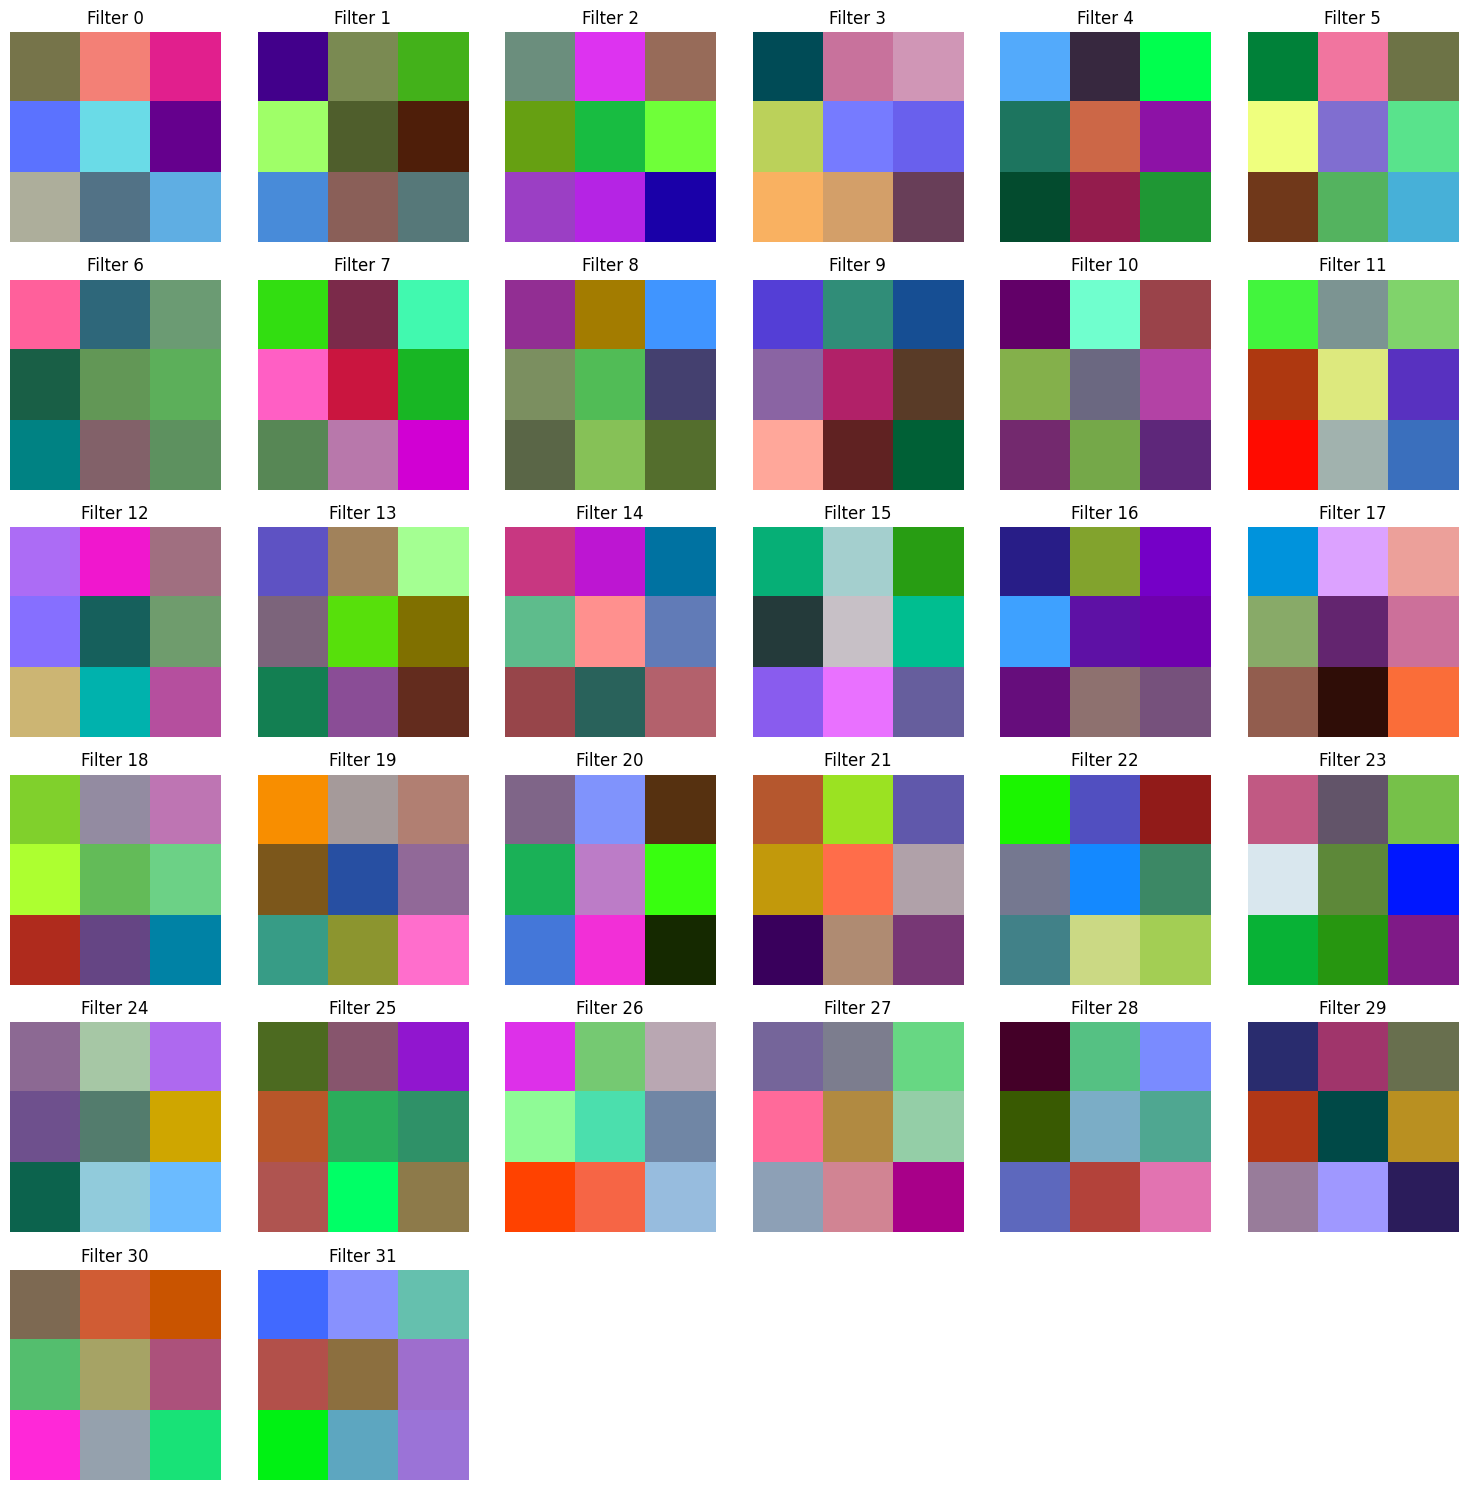

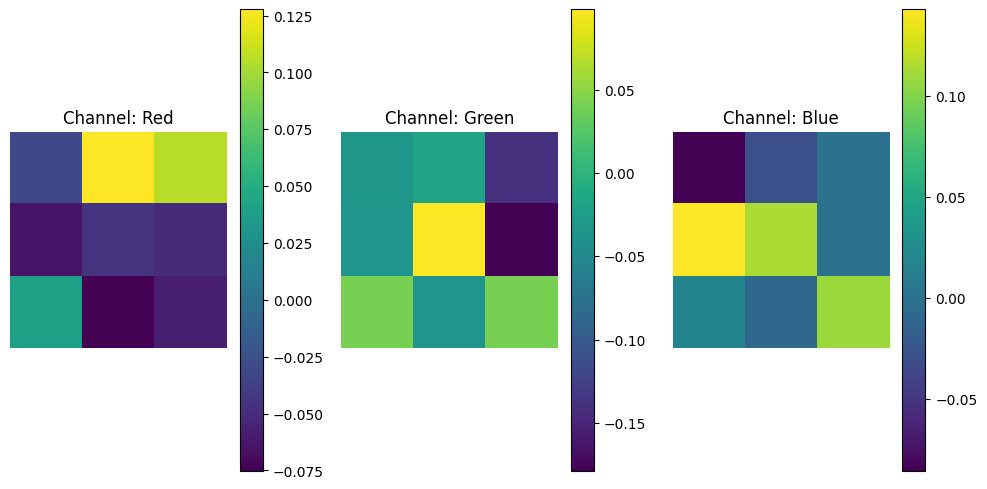

In [22]:
def visualize_filters(model, filter_index=0):
    """
    Visualize the filters in the first convolutional layer of the model.
    
    Args:
        model: The CNN model
        filter_index: Index of the filter to visualize in detail
    """
    # Get the weights of the first convolutional layer
    # Shape: [out_channels, in_channels, kernel_height, kernel_width]
    weights = model.conv1[0].weight.data.cpu().numpy()
    
    # Number of filters to display
    num_filters = weights.shape[0]
    
    # Create a grid to display filters
    grid_size = int(np.ceil(np.sqrt(num_filters)))
    
    plt.figure(figsize=(15, 15))
    for i in range(min(num_filters, grid_size**2)):
        plt.subplot(grid_size, grid_size, i + 1)
        
        # For RGB input (3 channels), convert the filter to an RGB image
        # We'll normalize the weights to be in [0, 1] for visualization
        filter_weights = weights[i].transpose(1, 2, 0)
        filter_min, filter_max = filter_weights.min(), filter_weights.max()
        filter_weights = (filter_weights - filter_min) / (filter_max - filter_min + 1e-10)
        
        plt.imshow(filter_weights)
        plt.title(f"Filter {i}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Show a detailed view of a single filter
    plt.figure(figsize=(10, 5))
    filter_weights = weights[filter_index]
    
    for i in range(3):  # For each input channel (R, G, B)
        plt.subplot(1, 3, i + 1)
        channel_name = ['Red', 'Green', 'Blue'][i]
        plt.title(f"Channel: {channel_name}")
        plt.imshow(filter_weights[i], cmap='viridis')
        plt.colorbar()
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize the filters
print("Filter visualization would be shown here in an interactive notebook")
visualize_filters(model_initialized)

Feature maps for conv1


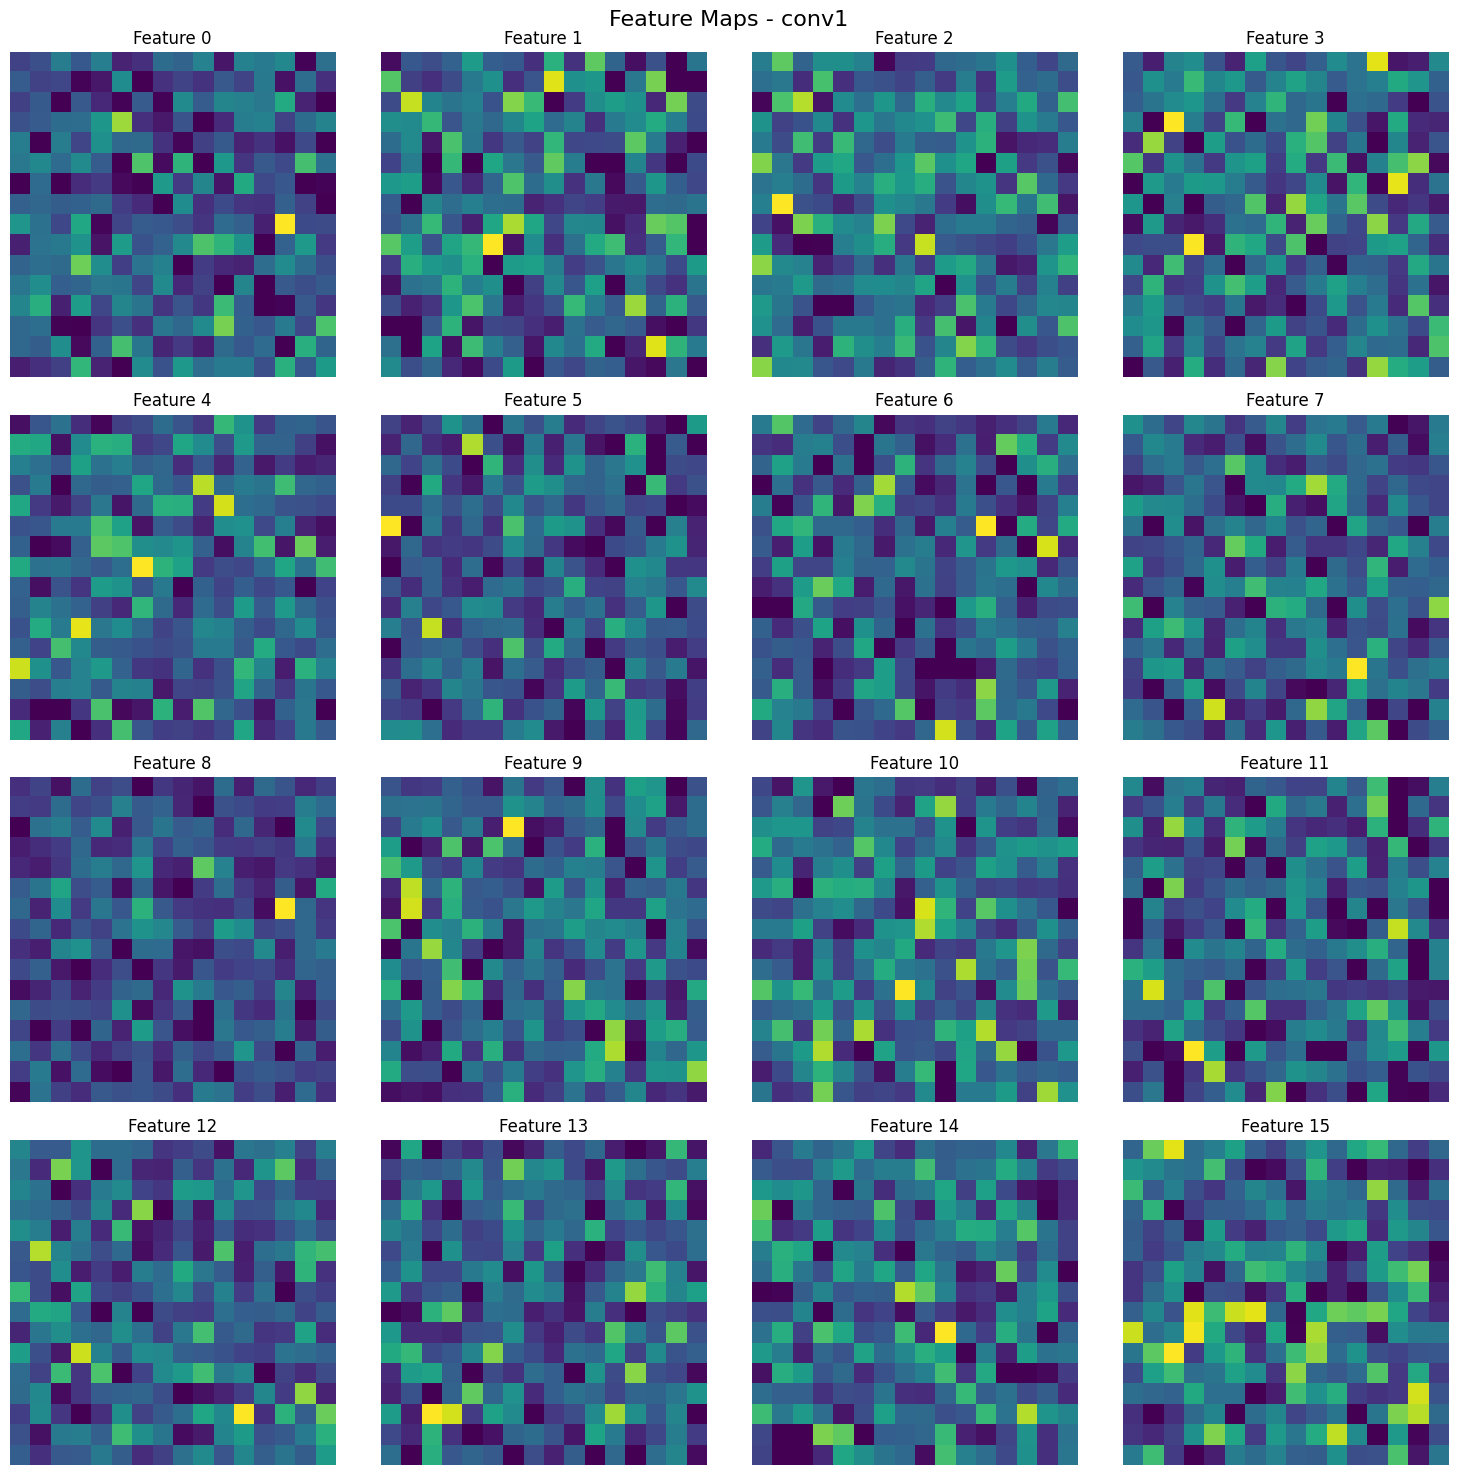

Feature maps for conv2


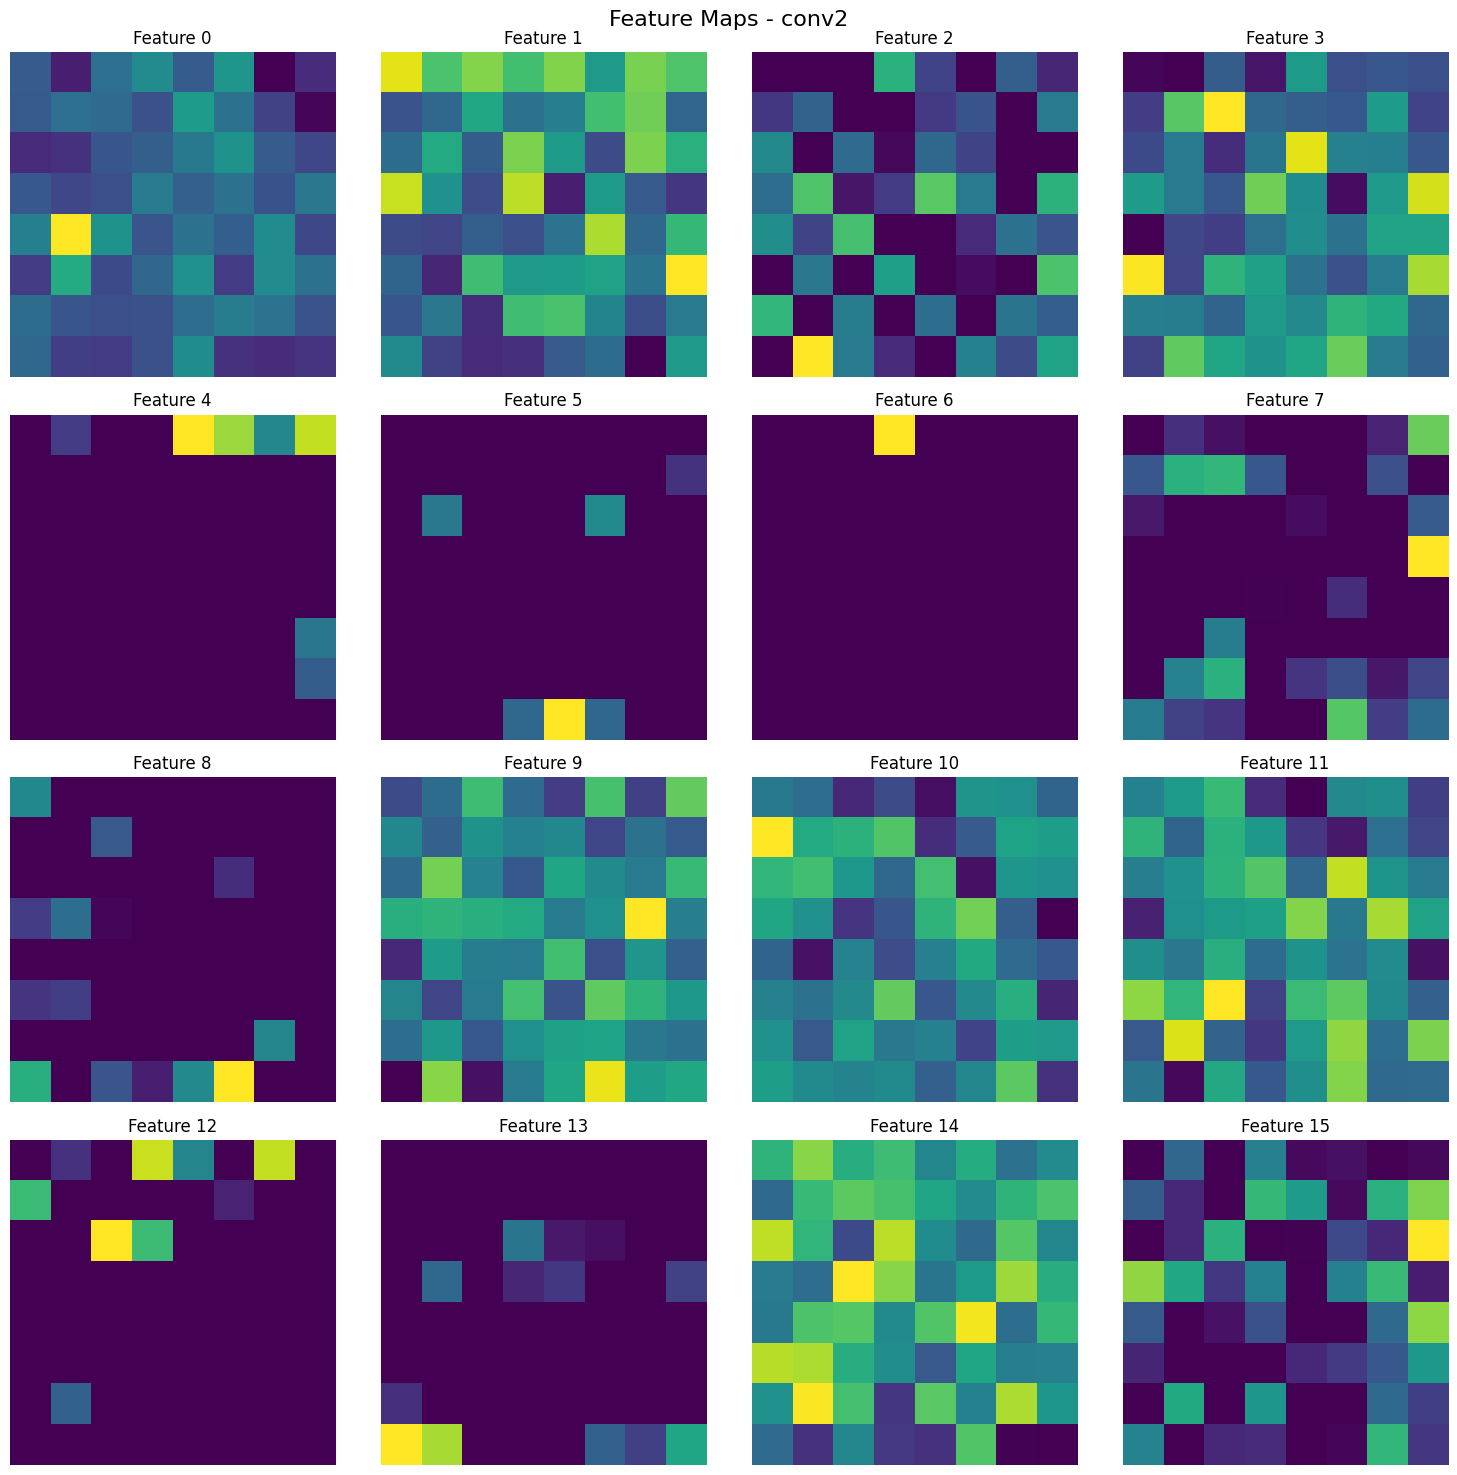

Feature maps for conv3


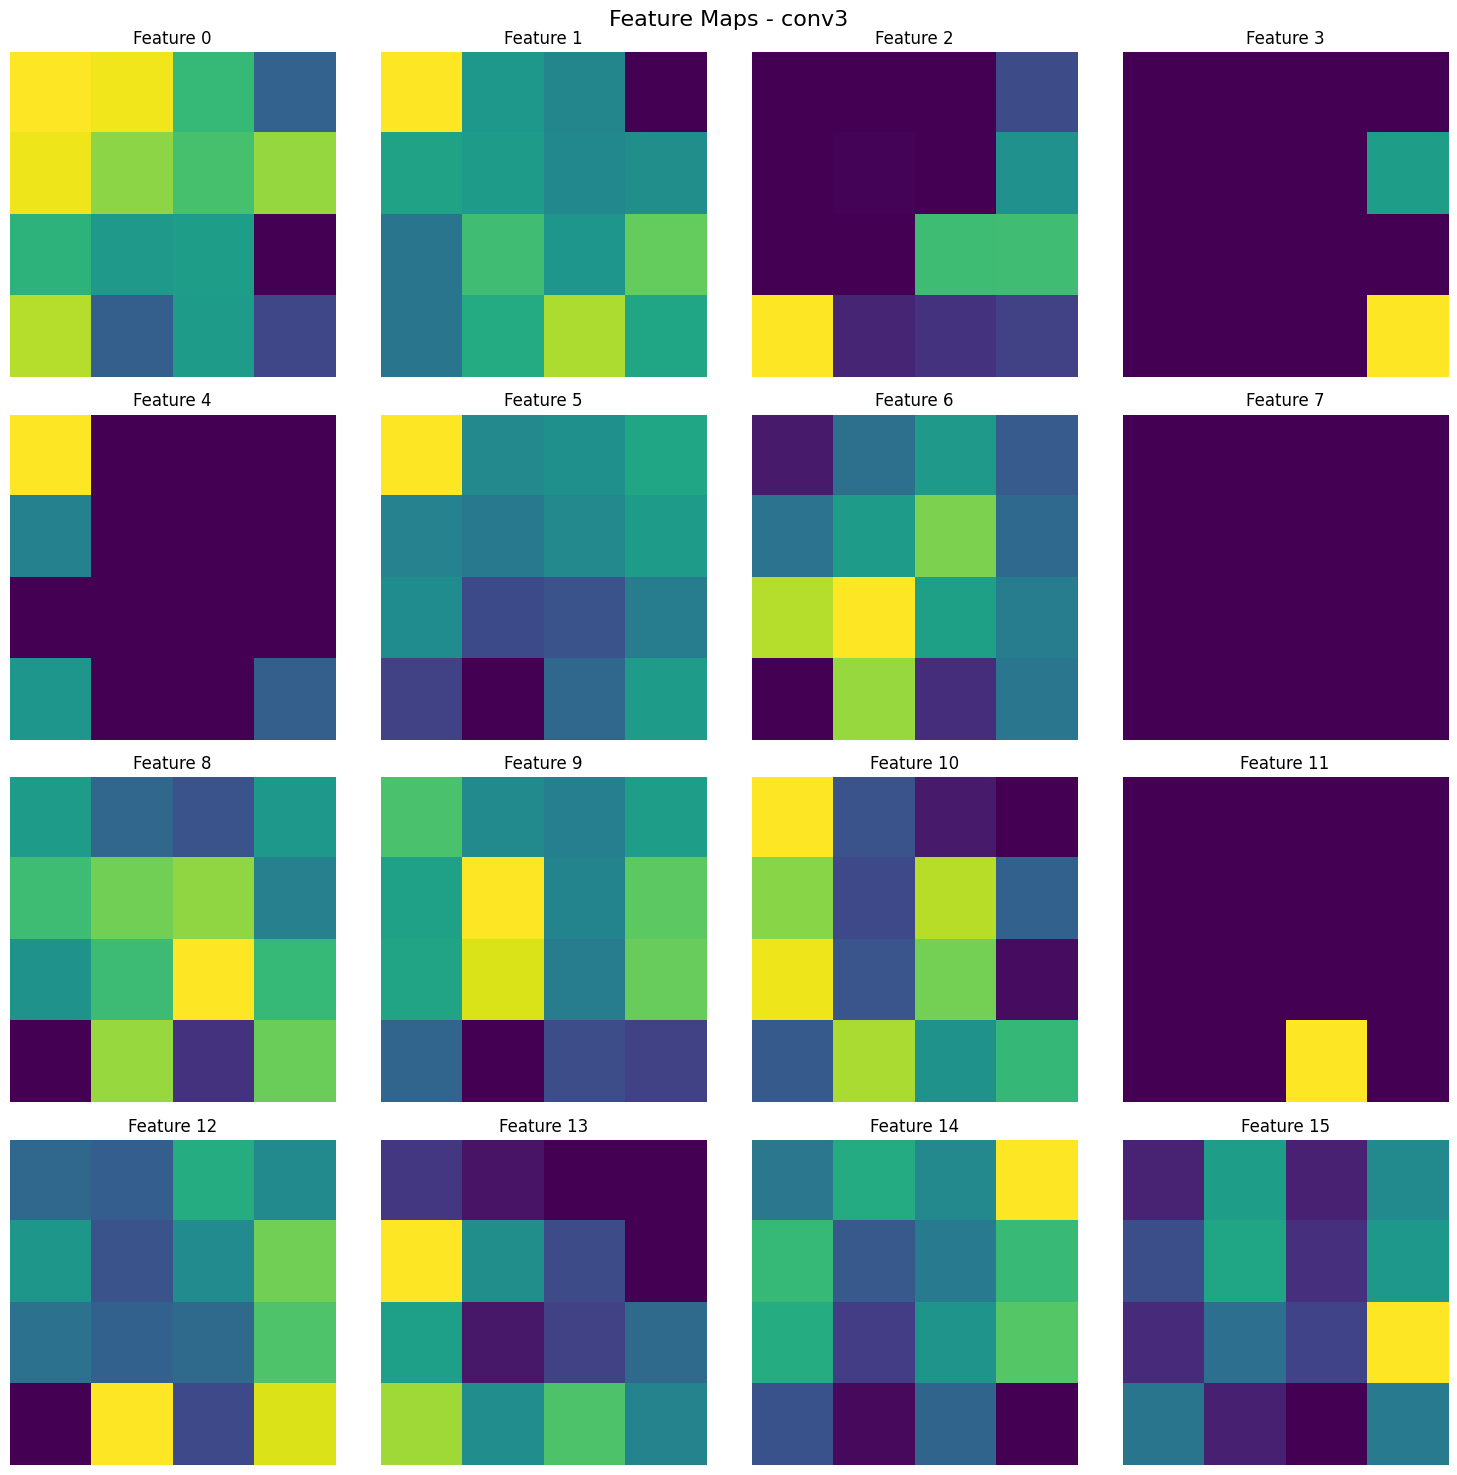

Feature maps for conv4


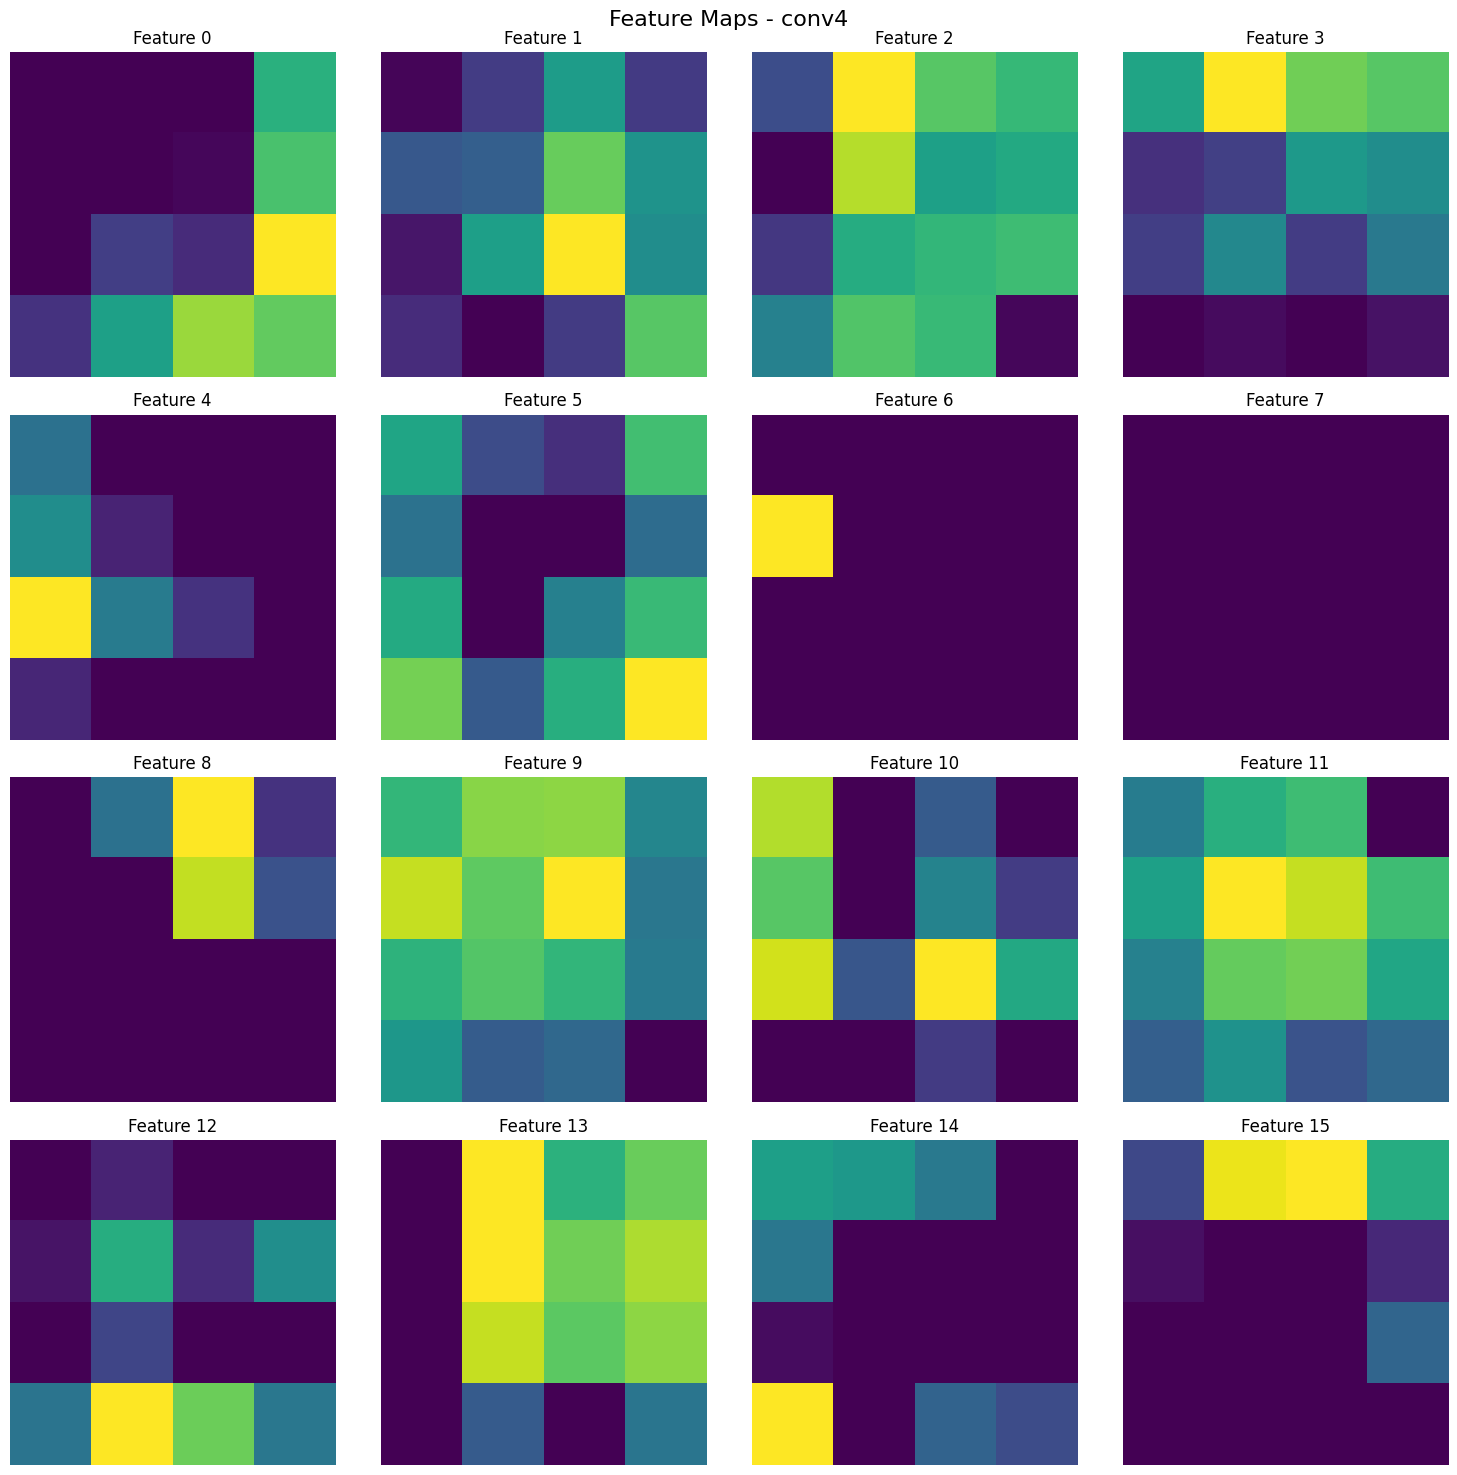

In [25]:
# Let's also create a function to visualize feature maps when an image passes through the network

def visualize_feature_maps(model, input_image):
    """
    Visualize feature maps produced by different layers of the model.
    
    Args:
        model: The CNN model
        input_image: Input image tensor of shape [1, channels, height, width]
    """
    # Move the model to evaluation mode
    model.eval()
    
    # Create hooks to get intermediate outputs
    feature_maps = {}
    
    def get_features(name):
        def hook(model, input, output):
            feature_maps[name] = output.detach().cpu().numpy()
        return hook
    
    # Register hooks for each layer we want to visualize
    hooks = [
        model.conv1.register_forward_hook(get_features('conv1')),
        model.conv2.register_forward_hook(get_features('conv2')),
        model.conv3.register_forward_hook(get_features('conv3')),
        model.conv4.register_forward_hook(get_features('conv4'))
    ]
    
    # Forward pass
    with torch.no_grad():
        output = model(input_image)
    
    # Remove hooks
    for hook in hooks:
        hook.remove()
    
    # Function to display a grid of feature maps
    def display_feature_maps(layer_name, num_features=16):
        feature_map = feature_maps[layer_name][0]  # Get the first sample in the batch
        num_features = min(num_features, feature_map.shape[0])
        
        grid_size = int(np.ceil(np.sqrt(num_features)))
        
        plt.figure(figsize=(15, 15))
        for i in range(num_features):
            plt.subplot(grid_size, grid_size, i + 1)
            
            # Normalize for better visualization
            feat_map = feature_map[i]
            feat_min, feat_max = feat_map.min(), feat_map.max()
            feat_norm = (feat_map - feat_min) / (feat_max - feat_min + 1e-10)
            
            plt.imshow(feat_norm, cmap='viridis')
            plt.title(f"Feature {i}")
            plt.axis('off')
        
        plt.suptitle(f"Feature Maps - {layer_name}", fontsize=16)
        plt.tight_layout()
        plt.show()
    
    # Display feature maps for each layer
    for layer_name in feature_maps.keys():
        # Note: In a real notebook, this would show the actual feature maps
        print(f"Feature maps for {layer_name}")
        display_feature_maps(layer_name)

# For demonstration, we'd use a sample image
sample_image = torch.randn(1, 3, 32, 32).to(device)
visualize_feature_maps(model_initialized, sample_image)